# Time Series DIY: Seasonal Decomposition
[Source](https://towardsdatascience.com/time-series-diy-seasonal-decomposition-f0b469afed44)

-----------

The statsmodel’s seasonal_decompose splits a time series into three components: trend, seasonality, and the residuals.

The interpretation of the components is very intuitive:

* trend — the general direction of the series over a long period of time
* seasonality — a distinct, repeating pattern observed in regular intervals due to various seasonal factors. Could be monthly, weekly, etc.
* residual — the irregular component consisting of the fluctuations in the time series after removing the previous components

## Step-by-step tutorial

### Step 1: Setup
As always, we start by importing the libraries.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

### Step 2: Data
We will be using the Australian airline passengers time series. We load it from a CSV file (available [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv)), but you can also get it from other sources, for example, from the seaborn library ([here](https://github.com/mwaskom/seaborn-data/blob/master/flights.csv)).

In [2]:
df = pd.read_csv("data/airline-passengers.csv", index_col=0)
df.index = pd.to_datetime(df.index)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


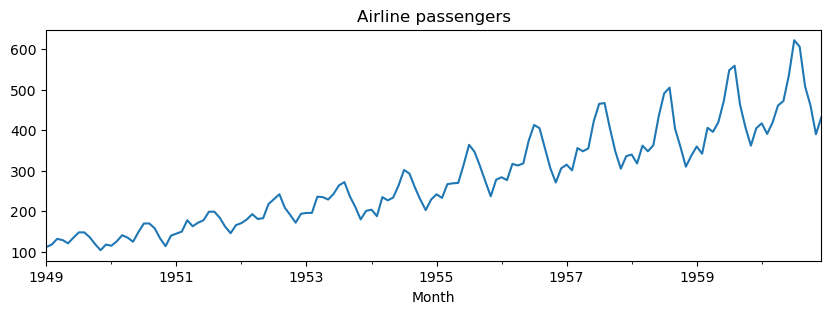

In [3]:
y = df["Passengers"]
y.name = "n_passengers"

y.plot(title="Airline passengers", figsize=(10,3))
plt.show()

### Step 3: Decomposing

How to Choose Between Additive and Multiplicative Decompositions
- The additive model is useful when the seasonal variation is relatively constant over time.
- The multiplicative model is useful when the seasonal variation increases over time.

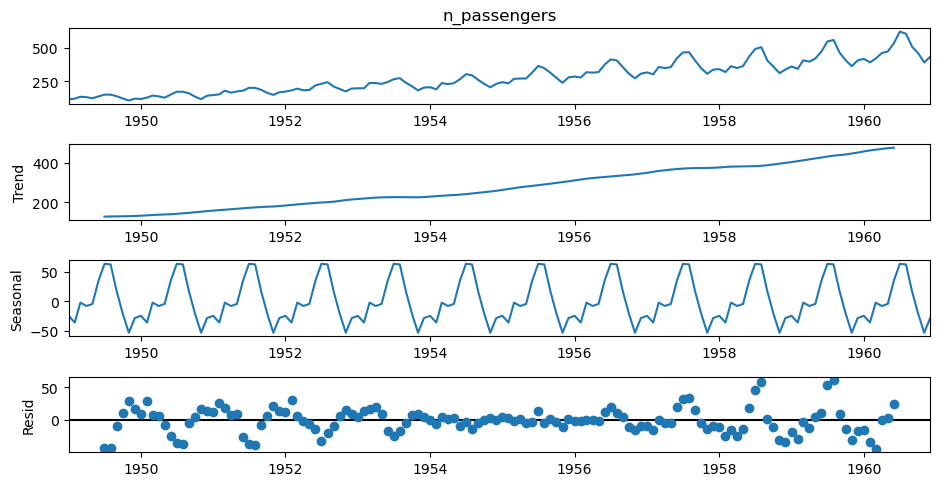

In [4]:
# On a side note, in the additive decomposition the detrended series is centered at zero, 
# as adding zero makes no change to the trend. 
# The same logic is applied in the multiplicative approach, with the difference that it is centered around one. 
# That is because multiplying the trend by one also has no effect on it.
seasonal_decomp = seasonal_decompose(y, model="additive")
fig = seasonal_decomp.plot()
fig.set_size_inches((10, 5))
plt.show()

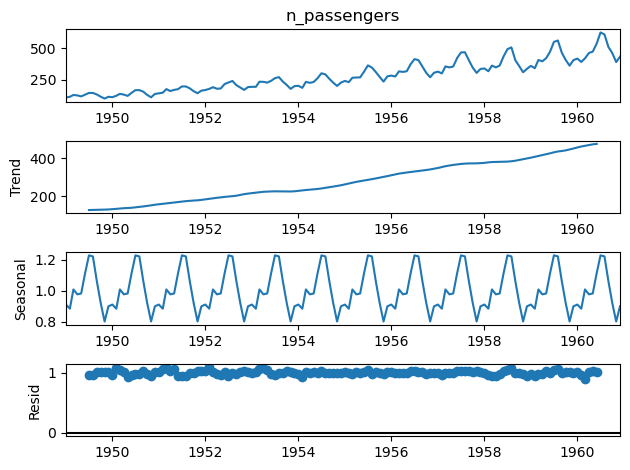

In [5]:
seasonal_decomp = seasonal_decompose(y, model="multiplicative")
seasonal_decomp.plot()
plt.show()

-----------